checkpoint: <class 'keras.callbacks.ModelCheckpoint'>
train_x: <class 'numpy.ndarray'>
train_y: <class 'numpy.ndarray'>
validation_x: <class 'numpy.ndarray'>
validation_y: <class 'numpy.ndarray'>
Epoch 1/50
8/8 [==============================] - 70s 920ms/step - loss: 0.7004 - accuracy: 0.4687 - val_loss: 0.6924 - val_accuracy: 0.4609
Epoch 2/50
8/8 [==============================] - 3s 352ms/step - loss: 0.6961 - accuracy: 0.4692 - val_loss: 0.6916 - val_accuracy: 0.4935
Epoch 3/50
8/8 [==============================] - 3s 394ms/step - loss: 0.6930 - accuracy: 0.4984 - val_loss: 0.6903 - val_accuracy: 0.5739
Epoch 4/50
8/8 [==============================] - 3s 321ms/step - loss: 0.6901 - accuracy: 0.5251 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 3s 358ms/step - loss: 0.6879 - accuracy: 0.5172 - val_loss: 0.6874 - val_accuracy: 0.5717
Epoch 6/50
8/8 [==============================] - 3s 335ms/step - loss: 0.6874 - accuracy: 0.5359 - val

Epoch 38/50
8/8 [==============================] - 2s 294ms/step - loss: 0.1145 - accuracy: 0.9727 - val_loss: 0.0921 - val_accuracy: 0.9891
Epoch 39/50
8/8 [==============================] - 2s 300ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 40/50
8/8 [==============================] - 2s 291ms/step - loss: 0.1242 - accuracy: 0.9665 - val_loss: 0.0631 - val_accuracy: 0.9935
Epoch 41/50
8/8 [==============================] - 2s 290ms/step - loss: 0.1185 - accuracy: 0.9605 - val_loss: 0.2508 - val_accuracy: 0.9130
Epoch 42/50
8/8 [==============================] - 2s 296ms/step - loss: 0.1416 - accuracy: 0.9496 - val_loss: 0.0717 - val_accuracy: 0.9891
Epoch 43/50
8/8 [==============================] - 2s 297ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.0670 - val_accuracy: 0.9935
Epoch 44/50
8/8 [==============================] - 2s 296ms/step - loss: 0.0998 - accuracy: 0.9684 - val_loss: 0.0604 - val_accuracy: 0.9935
Epoch 45/50
8

No handles with labels found to put in legend.


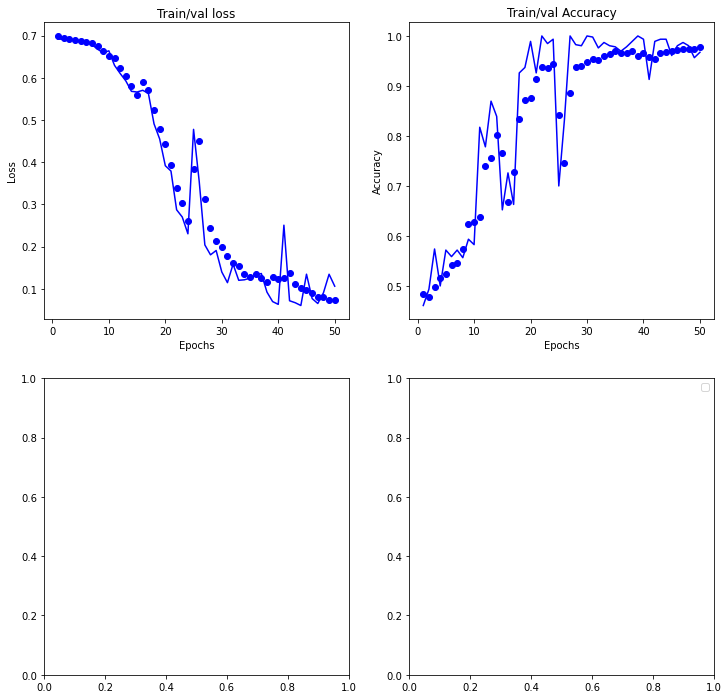

In [1]:
#imported for system and file managing usage
import sys
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow.keras.optimizers as opt
from keras.callbacks import ModelCheckpoint

#added to access the modules that placed in sub folder
sys.path.append('./modules')

#added to read special fucntions
from data import *
from plotter import *
from balanceData import *
from divideData import *
from models.gru.gru import *
from models.lstm.lstm import *
from models.rnn.rnn import *


# Define some parameters
FUTURE_PERIOD_PREDICT = 1
SEQ_LEN = 20
validation_percent = 15
test_percent = 20
EPOCHS = 50
BATCH_SIZE = 256


filePath = '/home/cryptocurrency_Forcasting/dataset/Binance_BTCUSDT_1hour.csv'

# Read the data from .csv
data = readData(filePath, FUTURE_PERIOD_PREDICT)

# divide data to train, validation, test sets 
train_data, validation_data, test_data = divide_data(data, validation_percent, test_percent)

# Select equal number of samples with all labels
x_train, y_train = balance_data(train_data, SEQ_LEN)
x_validation, y_validation = balance_data(validation_data, SEQ_LEN)
x_test, y_test = balance_data(test_data, SEQ_LEN)

# Create the model
model = lstm(x_train)

# Select an optimizer
opt = opt.Adam(learning_rate=0.001, decay=1e-6)

# Compile the model
model.compile(loss='binary_crossentropy',
             optimizer = opt,
             metrics= ['accuracy'])

checkpoint = ModelCheckpoint("models/{}.model".format(f"RNN_Final-{1}"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')


print('checkpoint:',  type(checkpoint))
print('train_x:',      type(x_train))
print('train_y:',      type(y_train))
print('validation_x:', type(x_validation))
print('validation_y:', type(y_validation))


history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_validation, y_validation), callbacks= checkpoint)

# Plot the model's accuracy and loss
p = plotter(history)

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               69120     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 69,249
Trainable params: 69,249
Non-trainable params: 0
_________________________________________________________________
